In [20]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
import numpy as np
from tqdm import tqdm
import h5py
import tifffile as tiff
from typing import Literal
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import re

sys.path.append(str(Path("..").resolve()))
from src import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
log_file="logs/logs/08-10-2025_T19-47-09.log"

In [29]:
rule = r"Epoch\s+(\d+)/\d+.*?,\s*([\d.]+),\s*([\d.]+),\s*([\d.]+),\s*([\d.]+),\s*([\d.]+),\s*([\d.]+),"
df = pd.DataFrame(columns=["Epoch", "Loss", "MSE", "L1", "Sobel", "SSIM", "SSIM3D"])
df.index.name = "Epoch"
for line in tqdm(open(log_file).readlines()):
    match = re.search(rule, line)
    if match:
        df.loc[len(df)] = [int(match.group(1))] + [float(match.group(i)) for i in range(2, 8)]

100%|██████████| 49586/49586 [00:35<00:00, 1404.06it/s]


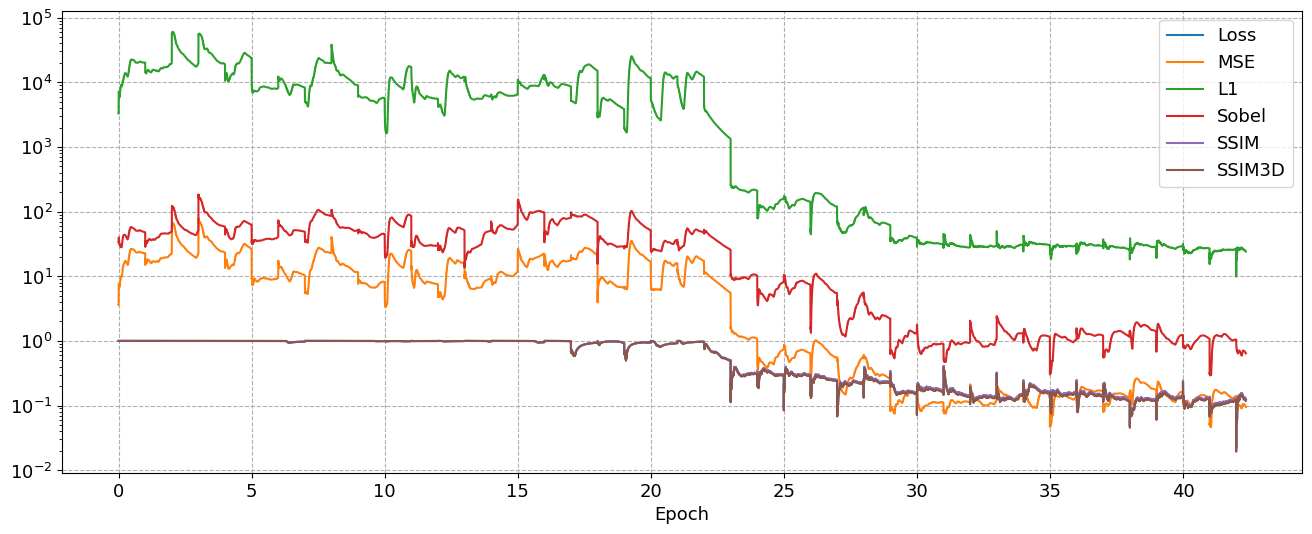

In [46]:
ax = df.drop(columns="Epoch").rolling(1).mean().plot(figsize=(16, 6))
ax.set_yscale("log")
ax.set_xticks(range(0, len(df), len(df[df["Epoch"] == 1])*5));
ax.set_xticklabels(range(0,int(df.iloc[-1]["Epoch"]),5));